## Muhammad Rifqi Febrian (mrf2174)
## HW 2 Part 1

In [1]:
#Import Python Libraries
import numpy as np
import scipy as sp
from scipy.stats import pearsonr
import scipy.stats
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1: Regression on California Test Scores

## Question 1
Find the url for the California Test Score Data Set from the following website:

https://vincentarelbundock.github.io/Rdatasets/datasets.html

Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data.  

https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv

The target data (i.e. the dependent variable) is named "testscr".  You can use all  variables in the data except for "readscr" and "mathscr" in the following analysis.  (These two variables were used to generate the dependent variable).

In [2]:
#read csv file
df=pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
#checking the dataset
df.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


### 1.1
Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.   

Text(0.5, 0, 'test score')

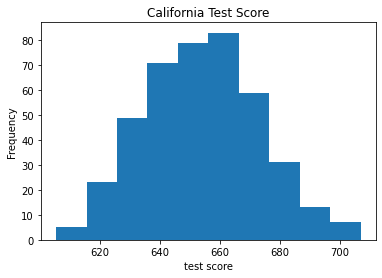

In [3]:
# Univariate distribution of the target feature (testscr)
# Target feature
# since testscr is an interval data, so I will choose histogram to visualize the univariate distribution
df['testscr'].plot.hist()
plt.title("California Test Score")
plt.xlabel("test score")

Text(0.5, 0, 'Number of teachers')

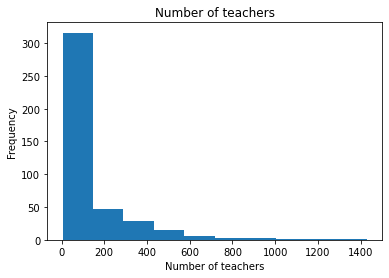

In [4]:
# First explanatory variable
# I chooses teacher as my first explanatory variable
df['teachers'].plot.hist()
plt.title("Number of teachers")
plt.xlabel("Number of teachers")

Text(0.5, 0, 'District average income')

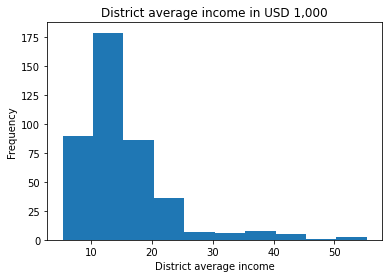

In [5]:
# Second explanatory variable
# I chooses average income as my second explanatory variable
df['avginc'].plot.hist()
plt.title("District average income in USD 1,000")
plt.xlabel("District average income")

Text(0.5, 0, 'Number of computers')

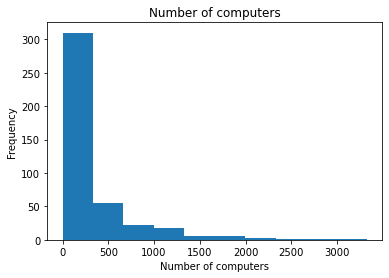

In [6]:
# Third explanatory variable
# I chooses number of computers as my third explanatory variable
df['computer'].plot.hist()
plt.title("Number of computers")
plt.xlabel("Number of computers")

### 1.2
Visualize the dependency of the target on each feature from 1.1

Coefficient correlation: -0.145


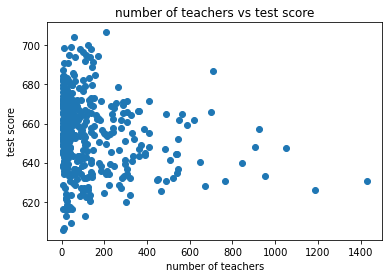

In [7]:
# dependency of test score to number of teachers
plt.scatter(x=df['teachers'],y=df['testscr'])
plt.show

#calculating the correlation
corr_1 = scipy.stats.pearsonr(df['teachers'], df['testscr'])[0]
plt.title("number of teachers vs test score")
plt.xlabel("number of teachers")
plt.ylabel("test score")
print('Coefficient correlation: %.3f' % corr_1)

Coefficient correlation: 0.712


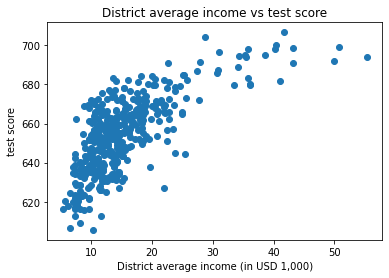

In [8]:
# dependency of test score to district average income
plt.scatter(x=df['avginc'],y=df['testscr'])
plt.show

#calculating the correlation
corr_2 = scipy.stats.pearsonr(df['avginc'], df['testscr'])[0]
plt.title("District average income vs test score")
plt.xlabel("District average income (in USD 1,000)")
plt.ylabel("test score")
print('Coefficient correlation: %.3f' % corr_2)

Coefficient correlation: -0.074


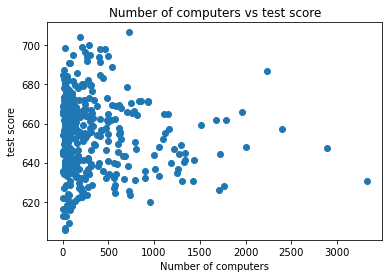

In [9]:
# dependency of test score to number of computers
plt.scatter(x=df['computer'],y=df['testscr'])
plt.show

#calculating the correlation
corr_3 = scipy.stats.pearsonr(df['computer'], df['testscr'])[0]
plt.title("Number of computers vs test score")
plt.xlabel("Number of computers")
plt.ylabel("test score")
print('Coefficient correlation: %.3f' % corr_3)

### 1.3
Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

#### 1.3. A
Splitting the data to training and test set

In [10]:
df.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [11]:
# Changing variables name to X, y to create train/test split

ts = df.drop(df.columns[[0,1,2,3,4,16,17]], axis=1) #delete unrelated column

y = ts['testscr']
X = ts.loc[:, ts.columns != "testscr"]

print(y[0:5])
X.head()

0    690.799988
1    661.200012
2    643.599976
3    647.700012
4    640.849976
Name: testscr, dtype: float64


,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


In [13]:
# Split data in training and test set
from sklearn.model_selection import train_test_split

# Use train_test_split(X,y) to create four new data sets, defaults to .75/.25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X.shape)
print(X_train.shape)
print(X_test.shape)
display(X)

(420, 10)
(315, 10)
(105, 10)


,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677
...,...,...,...,...,...,...,...,...,...,...
415,984,59.730000,0.101600,3.556900,195,0.198171,7290.338867,16.474134,28.716999,5.995935
416,3724,208.479996,1.074100,1.503800,721,0.193609,5741.462891,17.862625,41.734108,4.726101
417,441,20.150000,3.563500,37.193802,45,0.102041,4402.831543,21.885857,23.733000,24.263039
418,101,5.000000,11.881200,59.405899,14,0.138614,4776.336426,20.200001,9.952000,2.970297


#### 1.3 B
Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters.

###### KNN for Regression

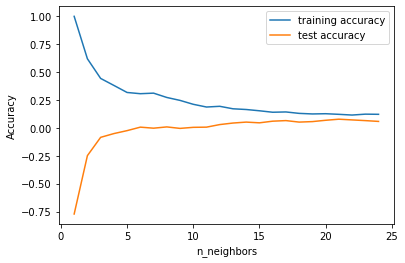

In [14]:
# KNN for regression
from sklearn.neighbors import KNeighborsRegressor

# Finding the best n_neighbors
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 20 
neighbors_settings = range(1, 25)
for n_neighbors in neighbors_settings: # build the model
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(reg.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(reg.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [15]:
knnreg = KNeighborsRegressor(n_neighbors=22)
knnreg.fit(X_train, y_train)

print(knnreg.score(X_test, y_test))

y_pred = knnreg.predict(X_test)

0.07191576854108905


In [16]:
# KNN for regression using cross validation with the default parameters
# import cross validation functions from sk learn

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

scores = cross_val_score(knnreg, X, y, cv=5)
print(scores)
print("Average cross-validation score: {:.3f}".format(scores.mean()))

[ -7.55371591 -14.53904884  -3.61125149 -27.49516195 -10.06562571]
Average cross-validation score: -12.653


##### Linear Regression (OLS)

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

#The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
#..attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [-6.63772796e-04  6.98908851e-03 -1.36133678e-01 -3.28932668e-01
  2.13560444e-03  9.76154170e+00  2.03541995e-03 -1.39945887e-01
  6.05434670e-01 -2.04283374e-01]
lr.intercept_: 655.86346378683


In [18]:
import statsmodels.api as sm

X_train_new = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_new ).fit()

model.summary() # get a complete summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     128.0
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          1.06e-102
Time:                        16:26:28   Log-Likelihood:                -1108.2
No. Observations:                 315   AIC:                             2238.
Df Residuals:                     304   BIC:                             2280.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        655.8635     11.332     57.875      0.000     633.564     678.163
enrltot       -0.0007      0.002     -0.369      0.712      -0.004       0.003
teachers       0.0070      0.040      0.176      0.861      -0.071       0.085
calwpct       -0.1361      0.065     -2.107      0.036      -0.263      -0.009
mealpct       -0.3289      0.041     -8.023      0.000      -0.410      -0.248
computer       0.0021      0.004      0.603      0.547      -0.005       0.009
compstu        9.7615      8.892      1.098      0.273      -7.737      27.260
expnstu        0.0020      0.001      2.010      0.045    4.28e-05       0.004
str           -0.1399      0.382     -0.367      0.714      -0.891       0.611
avginc         0.6054      0.099      6.136      0.000       0.411       0.800
elpct         -0.2043      0.039     -5.183      0.000      -0.282      -0.127
==============================================================================
Omnibus:                        4.947   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                5.436
Skew:                           0.173   Prob(JB):                       0.0660
Kurtosis:                       3.543   Cond. No.                     1.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
## Cross validation

# Let’s look at the training set and test set performance using r squared:

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

#cross validation
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring="r2")))

Training set score: 0.81
Test set score: 0.80
0.7944550222758904


#### 1.3 Ridge Regression

In [20]:
#Ridge regression using default parameter (alpha=1.0)

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
print("Training set score: {:.5f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.5f}".format(ridge.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))
print("ridge.coef_: {}".format(ridge.coef_))

Training set score: 0.80791
Test set score: 0.79911
Number of features used: 10
ridge.coef_: [-5.04400773e-04  1.57762368e-03 -1.40496029e-01 -3.27684784e-01
  3.06646915e-03  4.54938027e+00  2.10669828e-03 -1.92439841e-01
  6.05862173e-01 -2.06788121e-01]


In [21]:
# Cross validation

from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(Ridge(alpha=1.0), X_train, y_train, cv=5, scoring="r2")))

0.7942492744131304


#### 1.3 Lasso Regression

In [22]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
print("Training set score: {:.5f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.5f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print("lasso.coef_: {}".format(lasso.coef_))

Training set score: 0.80696
Test set score: 0.79842
Number of features used: 8
lasso.coef_: [-0.0006692   0.00280393 -0.13143036 -0.34107847  0.00380733  0.
  0.00263972 -0.          0.56830627 -0.20038206]


/Users/rifqimfebrian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.98949217129484, tolerance: 10.929720799520847
  model = cd_fast.enet_coordinate_descent(


In [23]:
# Cross validation

from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(Lasso(alpha=1.0), X_train, y_train, cv=5, scoring="r2")))

0.7949286565870415


/Users/rifqimfebrian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1142.6708174685318, tolerance: 8.497521986129497
  model = cd_fast.enet_coordinate_descent(
/Users/rifqimfebrian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 769.2437753525628, tolerance: 8.694900031505576
  model = cd_fast.enet_coordinate_descent(
/Users/rifqimfebrian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.169642416221905, tolerance: 8.679185059355651
  model = cd_fast.enet_coordinate_descent(


#### 1.3 C
Does scaling the data with the StandardScaler help?

In [24]:
# KNN for regression using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
KNNRegressor_scaled = KNeighborsRegressor(n_neighbors=22).fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
KNNRegressor_scaled.score(X_test_scaled, y_test)
print("Training set score: {:.5f}".format(KNNRegressor_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.5f}".format(KNNRegressor_scaled.score(X_test_scaled, y_test)))

Training set score: 0.76691
Test set score: 0.68417


In [25]:
## Linear Regression (OLS) with StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
OLS_scaled = LinearRegression().fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
OLS_scaled.score(X_test_scaled, y_test)

print("Training set score: {:.5f}".format(OLS_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.5f}".format(OLS_scaled.score(X_test_scaled, y_test)))
print("lasso.coef_: {}".format(OLS_scaled.coef_))

Training set score: 0.80813
Test set score: 0.79936
lasso.coef_: [-2.65924605  1.3495415  -1.61906375 -8.97046881  0.93812036  0.64041941
  1.30257187 -0.26138847  4.49027776 -3.7413484 ]


In [26]:
# Ridge regression using default parameter and standardscaler

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler #now we don't need to add preprocessing. before calls to StandardScaler()

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
ridge_scaled = Ridge(alpha=1.0).fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
ridge_scaled.score(X_test_scaled, y_test)
print("Training set score: {:.5f}".format(ridge_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.5f}".format(ridge_scaled.score(X_test_scaled, y_test)))
print("Number of features used: {}".format(np.sum(ridge_scaled.coef_ != 0)))
print("lasso.coef_: {}".format(ridge_scaled.coef_))

Training set score: 0.80810
Test set score: 0.79877
Number of features used: 10
lasso.coef_: [-1.49202788  0.13695571 -1.65394936 -8.87843243  0.99773539  0.62815851
  1.28353659 -0.31919286  4.52350385 -3.7655957 ]


In [27]:
# Using StandardScaler()
# Ridge regression using default parameter and standardscaler

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler #now we don't need to add preprocessing. before calls to StandardScaler()

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
lasso_scaled = Lasso(alpha=1.0).fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
lasso_scaled.score(X_test_scaled, y_test)
print("Training set score: {:.5f}".format(lasso_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.5f}".format(lasso_scaled.score(X_test_scaled, y_test)))
print("Number of features used: {}".format(np.sum(lasso_scaled.coef_ != 0)))
print("lasso.coef_: {}".format(lasso_scaled.coef_))

Training set score: 0.79900
Test set score: 0.79425
Number of features used: 7
lasso.coef_: [-0.         -0.         -0.50169345 -9.8162017  -0.          0.42912187
  0.58117925 -0.11021785  4.07947005 -3.00734747]


#### 1.3 C Answer
Does scaling the data with the StandardScaler help?

###### It helps for KNN regression, but it is not giving a huge difference for OLS, Ridge, and Lasso.

### 1.4
Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

#### KNN for Regression

In [32]:
### KNN for regression using GridSearchCV and pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

#refer to step name with two underscores before argument name when...
#you build a parameter grid

param_grid = {'kneighborsregressor__n_neighbors': range(1, 25)}
grid = GridSearchCV(knn_pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 7}
0.7158799500309299


In [29]:
### Linear Regression (OLS) ###
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

model = make_pipeline(StandardScaler(), LinearRegression())
param_grid = dict()
grid_ols = GridSearchCV(model, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_ols_result = grid_ols.fit(X_train, y_train)
print('Best Score: ', grid_ols_result.best_score_)

Best Score:  0.7944550222758906


In [30]:
### Ridge Regression ###

# find optimal alpha with grid search

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_ridge_result = grid_ridge.fit(X_train, y_train)
print('Best Score: ', grid_ridge_result.best_score_)
print('Best Params: ', grid_ridge_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.7944562316404363
Best Params:  {'alpha': 0.01}


In [31]:
### Lasso Regression ###

# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_lasso_result = grid_lasso.fit(X_train, y_train)
print('Best Score: ', grid_lasso_result.best_score_)
print('Best Params: ', grid_lasso_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.7949286565870415
Best Params:  {'alpha': 1}


/Users/rifqimfebrian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.98949217129484, tolerance: 10.929720799520847
  model = cd_fast.enet_coordinate_descent(


### 1.4
Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

##### Answer: KNN for regression is improving by using GridSearchCV. However, it does not giving any significant difference for Linear Regression (OLS), Ridge Regression, and OLS Regression

### 1.5 Answer
Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

##### Answer: In this dataset, linear regression (OLS) and Ridge Regression have the best result. Both regressions have the same amount of feature — both regressions agree that all features are important. 

### 1.6
Discuss which final model you would choose to predict new data

##### Answer: I will choose the linear regression (OLS) model since OLS has the best result